CFD Sources:
- https://github.com/emhayki/CFD-Fundamental/blob/main/CFD-Fundamental-Guide.pdf
- https://github.com/barbagroup/CFDPython/blob/master/lessons/03_CFL_Condition.ipynb


Theory sources:
- https://www.math.toronto.edu/jko/APM346_summary_2_2020.pdf
- https://folk.ntnu.no/leifh/teaching/tkt4140/._main042.html

In the past simulations, forward time with forward space discretization scheme and an inappropriate time step pass leads to an undesired behavior in the simulations. Changing the size of the grid can lead to instabilities to. Using the first example of `1DLinearConvectionEquation` and refactoring to use different grid sizes.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
total_x_length = 2
number_of_timesteps = 20
c = 1
dt = 0.025

def linearconv(number_of_grid_points_x):
    
    # creating the computational grid
    x = np.linspace(0, total_x_length, num=number_of_grid_points_x)
    
    # initializing the boundary conditions array u^0
    u = np.ones(number_of_grid_points_x)
    
    # populating the boundary conditions array, for u^0
    # setting u=2 between x = 0.5 and x = 1, with u = 1 for every else x
    u[(x >= 0.5) & (x <= 1)] = 2
    
    # x step size
    dx = total_x_length / (number_of_grid_points_x - 1)
    
    # initializing an auxiliar array of ones for the calculation
    un = np.ones(number_of_grid_points_x)
    
    # defining a results matrix (+1 rows to store the initial conditions)
    rows = number_of_timesteps
    columns = number_of_grid_points_x
    results = np.empty((rows+1, columns))
    
    # storing in the results the initial conditions
    results[0, :] = u
    
    for n in range(number_of_timesteps):
        un = u.copy()
        for i in range(1, number_of_grid_points_x):
            u[i] = un[i] - c*(dt/dx)*(un[i]-un[i-1])
        results[n+1, :] = u
        
    plt.plot(np.linspace(0, total_x_length, number_of_grid_points_x), results[number_of_timesteps, :])
    

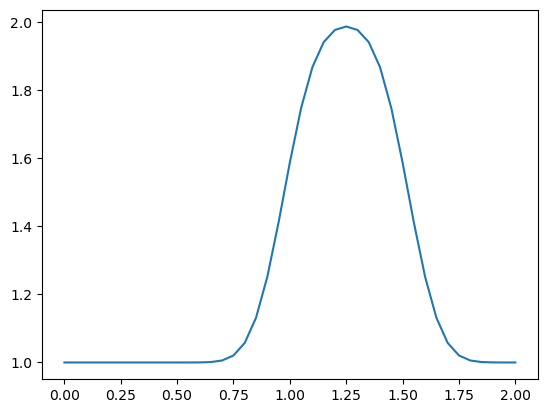

In [14]:
linearconv(41)

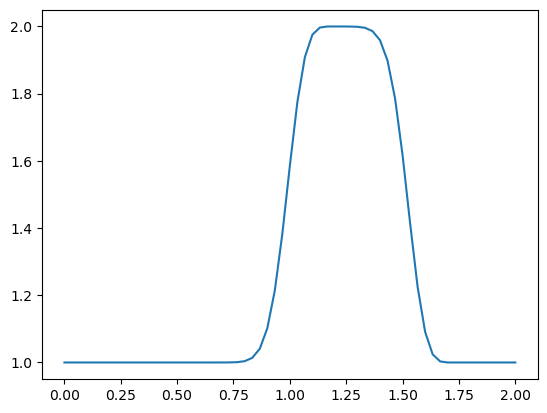

In [15]:
linearconv(61)

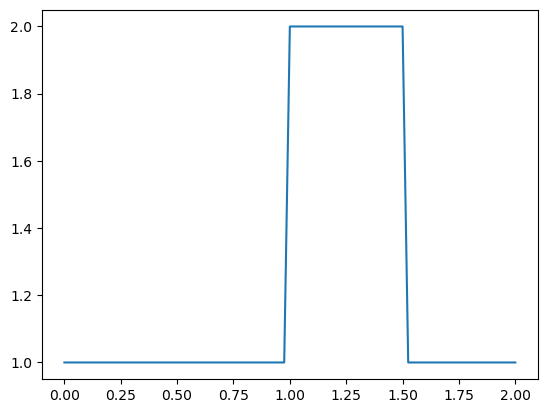

In [16]:
linearconv(81)

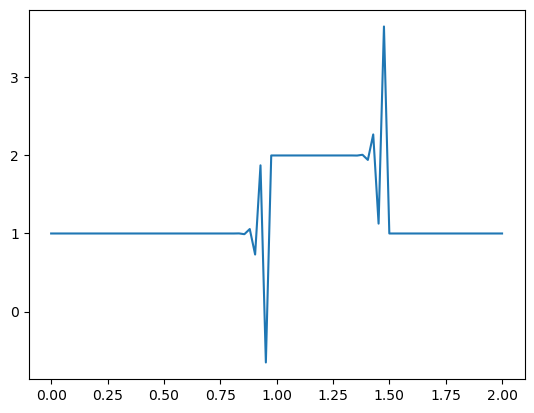

In [17]:
linearconv(85)

In each iteration of the time loop, we use existing data about our wave to estimate the speed of the wave in the subsequent time step. Initially, the increase in the number of grid points returned more accurate answers. There was less numerical diffusion and the wave looked much more like a square wave than it did in our first example.

Each iteration of our time loop covers a time-step of length $\Delta t$, which we have been defining as 0.0025.

During this iteration we evaluate the speed of the wave at each of the x points we have created. In the last plot, something has clearly gone wrong. 

What has happened is that over the time period $\Delta t$, `the wave is travelling a distance which is greater than dx`. The length `dx` of each grid box is related to the number of total points `number_of_grid_points_x`, so stability can be enforced if the $\Delta t$ step size is calculated with respect to the size of `number_of_grid_points_x`. 

$$
\sigma = \frac{u \Delta t}{\Delta x} \leq \sigma_{\max}
$$

where $u$ is the speed of the wave; $\sigma$ is called the Courant number and the value of $\sigma_{max}$ that will ensure stability depends on the discretization used.

In a new version of our code, we'll use the CFL number to calculate the appropiate time-step `dt` depending on the size of `dx`.

Sigma then tell's us how many times $\Delta t$ must be with respect to $\Delta x$. With $\sigma = 0.5$, $\Delta t = 0.5\Delta x$

In [18]:
def linearconvCN(number_of_grid_points_x, sigma):
    
    # creating the computational grid
    x = np.linspace(0, total_x_length, num=number_of_grid_points_x)
    
    # initializing the boundary conditions array u^0
    u = np.ones(number_of_grid_points_x)
    
    # populating the boundary conditions array, for u^0
    # setting u=2 between x = 0.5 and x = 1, with u = 1 for every else x
    u[(x >= 0.5) & (x <= 1)] = 2
    
    # x step size
    dx = total_x_length / (number_of_grid_points_x - 1)
    
    dt = sigma*dx
    
    # initializing an auxiliar array of ones for the calculation
    un = np.ones(number_of_grid_points_x)
    
    # defining a results matrix (+1 rows to store the initial conditions)
    rows = number_of_timesteps
    columns = number_of_grid_points_x
    results = np.empty((rows+1, columns))
    
    # storing in the results the initial conditions
    results[0, :] = u
    
    for n in range(number_of_timesteps):
        un = u.copy()
        for i in range(1, number_of_grid_points_x):
            u[i] = un[i] - c*(dt/dx)*(un[i]-un[i-1])
        results[n+1, :] = u
        
    plt.plot(np.linspace(0, total_x_length, number_of_grid_points_x), results[number_of_timesteps, :])



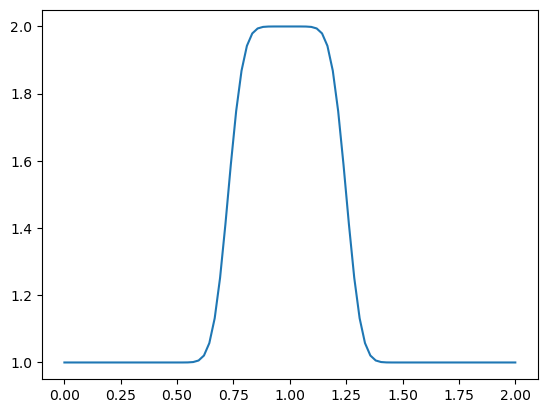

In [22]:
linearconvCN(85, sigma=0.5)